In [60]:
#Insert month field into Time id lok up table
dfTID['month'] = pd.DatetimeIndex(dfTID['DoP']).month

In [61]:
dfTID.head()

,TID,DoP,month
0,1,2010-12-01,12
1,2,2010-12-02,12
2,3,2010-12-03,12
3,4,2010-12-05,12
4,5,2010-12-06,12


In [68]:

dfTID.tail()


,TID,DoP,month
300,301,2011-12-05,12
301,302,2011-12-06,12
302,303,2011-12-07,12
303,304,2011-12-08,12
304,305,2011-12-09,12


In [69]:
dfTID.to_csv("D:\\TIMEIDLOOKUP.csv")

In [77]:
#Add column TID_Month to dfTId which corresponds to unique month
def f(row):
    
    if row['month'] == 1:
        val = 306
    elif  row['month']==2:
       val=307
        
    if row['month'] == 3:
        val = 308
    elif  row['month']==4:
       val=309
    if row['month'] == 5:
        val = 310
    elif  row['month']==6:
       val=311
    if row['month'] == 7:
        val = 312
    elif  row['month']==8:
       val=313
    if row['month'] == 9:
       val = 314
    elif  row['month']==10:
       val=315
    if row['month'] == 11:
        val = 316
    elif  row['month']==12:
       val=317
    return val

dfTID['TID_Mon'] = dfTID.apply(f, axis = 1)

In [78]:
dfTID.head()

,TID,DoP,month,TID_Mon
0,1,2010-12-01,12,317
1,2,2010-12-02,12,317
2,3,2010-12-03,12,317
3,4,2010-12-05,12,317
4,5,2010-12-06,12,317


In [79]:
dfTID.tail(20)

,TID,DoP,month,TID_Mon
285,286,2011-11-17,11,316
286,287,2011-11-18,11,316
287,288,2011-11-20,11,316
288,289,2011-11-21,11,316
289,290,2011-11-22,11,316
290,291,2011-11-23,11,316
291,292,2011-11-24,11,316
292,293,2011-11-25,11,316
293,294,2011-11-27,11,316
294,295,2011-11-28,11,316


In [80]:
#Write the  Timeidlookup to csv monthly
dfTID.to_csv("D:\\TIDMon.csv")

In [85]:
df=pd.read_csv("D:\\RFMSegment.csv")

In [87]:
df.head()

,Unnamed: 0,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,Max_Date,R,F,M,RFMScore,monthly
0,0,12346,1/18/2011,2,1,1/18/2011,0.00,346,346,12/30/2011,1,1,1,111,1
1,1,12347,12/7/2011,7,103,12/7/2010,4310.00,23,388,12/30/2011,5,1,5,515,12
2,2,12348,9/25/2011,4,22,12/16/2010,1797.24,96,379,12/30/2011,4,1,4,414,9
3,3,12349,11/21/2011,1,73,11/21/2011,1757.55,39,39,12/30/2011,5,1,4,514,11
4,4,12350,2/2/2011,1,17,2/2/2011,334.40,331,331,12/30/2011,1,1,2,112,2


In [88]:
#Add column TID_Month to df(RFMSegment table) which corresponds to unique month
def f(row):
    
    if row['monthly'] == 1:
        val = 306
    elif  row['monthly']==2:
       val=307
        
    if row['monthly'] == 3:
        val = 308
    elif  row['monthly']==4:
       val=309
    if row['monthly'] == 5:
        val = 310
    elif  row['monthly']==6:
       val=311
    if row['monthly'] == 7:
        val = 312
    elif  row['monthly']==8:
       val=313
    if row['monthly'] == 9:
       val = 314
    elif  row['monthly']==10:
       val=315
    if row['monthly'] == 11:
        val = 316
    elif  row['monthly']==12:
       val=317
    return val

df['TIDMon'] = df.apply(f, axis = 1)

In [101]:
#Build PAR Datamart in  sql
import sqlite3
conn = sqlite3.connect('D:\\Assignment-RetailDataSet\\sqlitestudio-3.1.1\\SQLiteStudio\\RFMAnalysis.db')
print ("Opened database successfully")

conn.execute('''CREATE TABLE PARDM (
    TimeID  DATE,
    BasketID   INTEGER,
    ProductID    CHAR(20))''')
print ("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [103]:
#Insert values into PAR Datamart
conn = sqlite3.connect('D:\\Assignment-RetailDataSet\\sqlitestudio-3.1.1\\SQLiteStudio\\RFMAnalysis.db')
print ("Opened database successfully")

sql =  "INSERT into PARDM(TimeID,BasketID,ProductID) SELECT TM_IDLOOKUP.TID, InvoiceNo,StockCode from TM_IDLOOKUP,RFMDM where TM_IDLOOKUP.DoP=RFMDM.DoP "
#print(sql)
conn.execute(sql)
conn.commit
print ("Values inserted successfully")

conn.close()

Opened database successfully
Values inserted successfully


In [104]:
#Create TimeSeries table in sql
conn = sqlite3.connect('D:\\Assignment-RetailDataSet\\sqlitestudio-3.1.1\\SQLiteStudio\\RFMAnalysis.db')
print ("Opened database successfully")

conn.execute('''CREATE TABLE TimeSeriesDM(
    TID  INTEGER,
    ProductID   CHAR(20),
    Qauntity INTEGER,
    Revenue FLOAT)''')
print ("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [105]:
#Insert Values in to time series datamart
conn = sqlite3.connect('D:\\Assignment-RetailDataSet\\sqlitestudio-3.1.1\\SQLiteStudio\\RFMAnalysis.db')
print ("Opened database successfully")

sql =  "insert into TimeSeriesDM(TID,ProductID,Qauntity,Revenue) Select TM_IDLOOKUP.TID,StockCode,Quantity,Quantity*UnitPrice from  TM_IDLOOKUP,RFMDM where TM_IDLOOKUP.DoP=RFMDM.DoP"
#print(sql)
conn.execute(sql)
conn.commit
print ("Values inserted successfully")

conn.close()

Opened database successfully
Values inserted successfully


In [115]:
#Performance Analysis
#Top 20 products
#From PAR DM,find the top 20 products which were bought most
#Read the PARDM table data to pandas dataframe
conn = sqlite3.connect('D:\\Assignment-RetailDataSet\\sqlitestudio-3.1.1\\SQLiteStudio\\RFMAnalysis.db')
data1 = pd.read_sql_query("select * from PARDM;", conn)

In [116]:
#Get the PARDM table into dfPAR datamrt
dfPAR=pd.DataFrame(data1)

In [117]:
dfPAR.head()

,TimeID,BasketID,ProductID
0,1,536365,21730
1,1,536365,22752
2,1,536365,71053
3,1,536365,84029E
4,1,536365,84029G


In [118]:
dfPAR.to_csv("D:\\PARDM.csv")

In [122]:
dfProductGroupByBID=dfPAR.groupby('ProductID')['BasketID'].apply(lambda x: x.count())

In [123]:
dfProductGroupByBID.head()

ProductID
10002     49
10080     21
10120     30
10123C     3
10124A     5
Name: BasketID, dtype: int64

In [130]:
dfTop20Products=dfProductGroupByBID.sort_values(ascending=False).head(20)

In [131]:
#Top 20 Products
dfTop20Products

ProductID
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
20725     1359
22720     1232
POST      1196
20727     1126
22197     1118
23203     1115
22383     1103
21212     1080
23209     1040
23298     1036
22086     1029
22382     1021
20728     1012
22457      997
22469      996
Name: BasketID, dtype: int64

In [134]:
#Bottom 20 products
dfBottom20Products=dfProductGroupByBID.sort_values(ascending=True).head(20)

In [135]:
dfBottom20Products

ProductID
22323     1
85068     1
20678     1
21144     1
85065     1
90129E    1
84809B    1
90035C    1
90167     1
90038C    1
37461     1
90100     1
90038B    1
37471     1
90165B    1
90038A    1
90037B    1
90036F    1
90163B    1
84839     1
Name: BasketID, dtype: int64

In [150]:
#Contribution Analysis
#Deciles with Revenue 
#df['Decile']=pd.qcut(df['Monetary'],10)
decileanalysis=pd.DataFrame(df.groupby(['Decile'])['Monetary'].sum())
decileanalysis['Count']=df.groupby(['Decile'])['Monetary'].count()
decileanalysis['Avg_Revenue']=decileanalysis['Monetary']/decileanalysis['Count']
decileanalysis

,Monetary,Count,Avg_Revenue
Decile,,,
"(-4287.631, 146.022]",24944.850,438,56.951712
"(146.022, 234.392]",82539.340,437,188.877208
"(234.392, 337.37]",126464.560,437,289.392586
"(337.37, 465.412]",173204.511,437,396.348995
"(465.412, 648.075]",244828.901,437,560.249201
"(648.075, 909.134]",333354.871,437,762.825792
"(909.134, 1311.979]",477331.730,437,1092.292288
"(1311.979, 2002.092]",708041.210,437,1620.231602
"(2002.092, 3505.6]",1145234.451,437,2620.673801


In [151]:
#Contribution Analysis
#Percentiles  with Revenue 
df['Percentile']=pd.qcut(df['Monetary'],100)
Percentileanalysis=pd.DataFrame(df.groupby(['Percentile'])['Monetary'].sum())
Percentileanalysis['Count']=df.groupby(['Percentile'])['Monetary'].count()
Percentileanalysis['Avg_Revenue']=Percentileanalysis['Monetary']/Percentileanalysis['Count']
Percentileanalysis

,Monetary,Count,Avg_Revenue
Percentile,,,
"(-4287.631, 0.0]",-13229.140,50,-264.582800
"(0.0, 47.593]",1019.860,38,26.838421
"(47.593, 73.5]",2754.850,45,61.218889
"(73.5, 89.127]",3379.640,42,80.467619
"(89.127, 101.138]",4177.910,44,94.952500
"(101.138, 110.763]",4660.920,44,105.930000
"(110.763, 116.01]",4986.460,44,113.328636
"(116.01, 125.882]",5218.810,43,121.367674
"(125.882, 135.938]",5785.970,44,131.499318


In [5]:

#Product Recommendations
import pandas as pd
dfPAR=pd.read_csv("D:\\PARDM.csv")

In [2]:
#Import base table
import sqlite3
import pandas as pd
conn = sqlite3.connect('D:\\Assignment-RetailDataSet\\sqlitestudio-3.1.1\\SQLiteStudio\\RFMAnalysis.db')
print ("Opened database successfully")
data1 = pd.read_sql_query("select * from RFMDM;", conn)
df1 = pd.DataFrame(data1)

Opened database successfully


In [3]:
df1.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID
0,536365,85123A,6,2010-12-01,2.55,17850
1,536365,71053,6,2010-12-01,3.39,17850
2,536365,84406B,8,2010-12-01,2.75,17850
3,536365,84029G,6,2010-12-01,3.39,17850
4,536365,84029E,6,2010-12-01,3.39,17850


In [4]:
df1.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df1['InvoiceNo'] = df1['InvoiceNo'].astype('str')
df1 = df1[~df1['InvoiceNo'].str.contains('C')]

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
basket = (df1.groupby(['InvoiceNo','StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.tail()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POST', inplace=True, axis=1)
basket_sets.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
basket_sets.drop('BANK CHARGES', inplace=True, axis=1)
basket_sets.drop('C2', inplace=True, axis=1)
basket_sets.drop('DOT', inplace=True, axis=1)
basket_sets.drop('M', inplace=True, axis=1)
basket_sets.drop('PADS', inplace=True, axis=1)
basket_sets.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from mlxtend.preprocessing import OnehotTransactions
oht = OnehotTransactions()
oht_ary = oht.fit(basket_sets).transform(basket_sets)
dfbs = pd.DataFrame(oht_ary, columns=oht.columns_)

In [12]:
frequent_itemsets = apriori(dfbs, min_support=0.02, use_colnames=True)

In [13]:
frequent_itemsets.head(30)

,support,itemsets
0,0.081085,[0]
1,0.096029,[1]
2,0.146634,[2]
3,0.075313,[3]
4,0.070296,[4]
5,0.063552,[5]
6,0.053410,[6]
7,0.058751,[7]
8,0.073263,[8]
9,0.069055,[9]


In [14]:
rules = association_rules(frequent_itemsets,min_threshold=0.04)

In [15]:
rules

,antecedants,consequents,support,confidence,lift
0,(3),(5),0.075313,0.320917,5.049674
1,(5),(3),0.063552,0.380306,5.049674
2,(0),(8),0.081085,0.333333,4.549828
3,(8),(0),0.073263,0.368925,4.549828
4,(1),(6),0.096029,0.246629,4.617696
5,(6),(1),0.053410,0.443434,4.617696
6,(0),(4),0.081085,0.270792,3.852184
7,(4),(0),0.070296,0.312356,3.852184
8,"(1, 3)",(2),0.030805,0.779335,5.314843
9,"(1, 2)",(3),0.070727,0.339436,4.507004


In [16]:
#Look for items with large lift and high confidence

rules[ (rules['lift'] >= 5) &
       (rules['confidence'] >= 0.6) ]

,antecedants,consequents,support,confidence,lift
8,"(1, 3)",(2),0.030805,0.779335,5.314843
52,(3),(2),0.075313,0.779370,5.315083
60,(1),(2),0.096029,0.736517,5.022839


In [59]:
#SalesForeCasting Model##
#dfTS-Time Series DM

dfTS=pd.read_csv('D:\\TimeSeriesDM.csv')


In [60]:
dfTS.head()

,TID,ProductID,Qauntity,Revenue,DoP
0,1,10002,12,10.20,12/1/2010
1,1,10002,48,40.80,12/1/2010
2,1,10125,2,1.70,12/1/2010
3,1,10133,5,4.25,12/1/2010
4,1,15044B,1,2.95,12/1/2010


In [62]:
dfTS['DoP'] = pd.to_datetime(dfTS['DoP'])

In [65]:
dfTS.head()

,TID,ProductID,Qauntity,Revenue
DoP,,,,
2010-12-01,1,10002,12,10.20
2010-12-01,1,10002,48,40.80
2010-12-01,1,10125,2,1.70
2010-12-01,1,10133,5,4.25
2010-12-01,1,15044B,1,2.95


In [64]:
dfTS.index = dfTS['DoP']
del dfTS['DoP']
dfTS

KeyError: 'DoP'

In [67]:
dfTS['2010']

,TID,ProductID,Qauntity,Revenue
DoP,,,,
2010-12-01,1,10002,12,10.20
2010-12-01,1,10002,48,40.80
2010-12-01,1,10125,2,1.70
2010-12-01,1,10133,5,4.25
2010-12-01,1,15044B,1,2.95
2010-12-01,1,15056BL,2,11.90
2010-12-01,1,15056BL,6,29.70
2010-12-01,1,15056BL,12,71.40
2010-12-01,1,15056N,2,11.90


In [69]:
dfTS['2010-12']

,TID,ProductID,Qauntity,Revenue
DoP,,,,
2010-12-01,1,10002,12,10.20
2010-12-01,1,10002,48,40.80
2010-12-01,1,10125,2,1.70
2010-12-01,1,10133,5,4.25
2010-12-01,1,15044B,1,2.95
2010-12-01,1,15056BL,2,11.90
2010-12-01,1,15056BL,6,29.70
2010-12-01,1,15056BL,12,71.40
2010-12-01,1,15056N,2,11.90


In [70]:
dfTS['2011-01']

,TID,ProductID,Qauntity,Revenue
DoP,,,,
2011-01-04,21,15056BL,1,5.95
2011-01-04,21,15056BL,3,17.85
2011-01-04,21,15056N,4,23.80
2011-01-04,21,16156S,25,10.50
2011-01-04,21,16156S,50,21.00
2011-01-04,21,16161P,50,21.00
2011-01-04,21,17091J,72,27.36
2011-01-04,21,20618,1,2.10
2011-01-04,21,20655,1,1.25


In [72]:
dfTS.groupby(level=0).count()

,TID,ProductID,Qauntity,Revenue
DoP,,,,
2010-12-01,1968,1968,1968,1968
2010-12-02,2044,2044,2044,2044
2010-12-03,1117,1117,1117,1117
2010-12-05,2724,2724,2724,2724
2010-12-06,1974,1974,1974,1974
2010-12-07,1133,1133,1133,1133
2010-12-08,2021,2021,2021,2021
2010-12-09,1822,1822,1822,1822
2010-12-10,1449,1449,1449,1449


In [84]:
dfTS1=dfTS.resample('D').sum()

In [85]:
dfTS1.head()

,TID,Qauntity,Revenue
DoP,,,
2010-12-01,1968.0,24032.0,46051.26
2010-12-02,4088.0,20855.0,45775.43
2010-12-03,3351.0,11548.0,22598.46
2010-12-04,NaN,NaN,NaN
2010-12-05,10896.0,16394.0,31380.60


In [86]:
dfTS1.dropna()

,TID,Qauntity,Revenue
DoP,,,
2010-12-01,1968.0,24032.0,46051.26
2010-12-02,4088.0,20855.0,45775.43
2010-12-03,3351.0,11548.0,22598.46
2010-12-05,10896.0,16394.0,31380.60
2010-12-06,9870.0,16095.0,30465.08
2010-12-07,6798.0,19351.0,53125.99
2010-12-08,14147.0,21275.0,38048.68
2010-12-09,14576.0,16904.0,37177.85
2010-12-10,13041.0,15388.0,32005.35


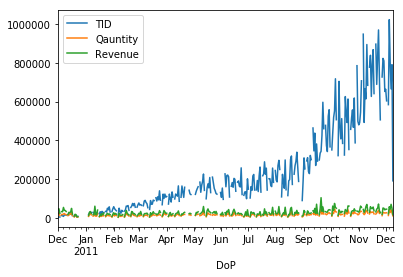

In [87]:
dfTS.resample('D').sum().plot()

In [88]:
ts = dfTS['Revenue']
ts.tail(20)

DoP
2011-12-09     33.20
2011-12-09     66.60
2011-12-09     88.80
2011-12-09      1.25
2011-12-09      5.00
2011-12-09      2.50
2011-12-09      4.20
2011-12-09     51.00
2011-12-09      0.39
2011-12-09     20.80
2011-12-09     17.90
2011-12-09      2.95
2011-12-09     88.80
2011-12-09      9.48
2011-12-09   -224.69
2011-12-09     15.00
2011-12-09     18.00
2011-12-09     36.00
2011-12-09     36.00
2011-12-09     54.00
Name: Revenue, dtype: float64

In [107]:
ts_mon = ts.resample('M').sum()
ts_mon

DoP
2010-12-31     554604.020
2011-01-31     475074.380
2011-02-28     436546.150
2011-03-31     579964.610
2011-04-30     426047.851
2011-05-31     648251.080
2011-06-30     608013.160
2011-07-31     574238.481
2011-08-31     616368.000
2011-09-30     931440.372
2011-10-31     974603.590
2011-11-30    1132407.740
2011-12-31     342506.380
Freq: M, Name: Revenue, dtype: float64

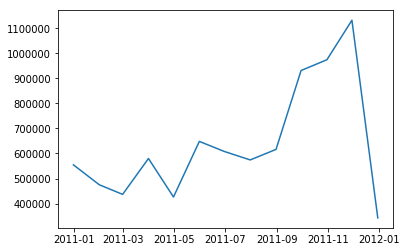

In [110]:
plt.plot(ts_mon.index.to_pydatetime(), ts_mon.values)

In [95]:
ts1=dfTS['Qauntity']

In [102]:
ts1.tail()

DoP
2011-12-09    1
2011-12-09    1
2011-12-09    2
2011-12-09    2
2011-12-09    3
Name: Qauntity, dtype: int64

In [108]:
ts1_mon = ts1.resample('M').sum()

In [109]:
ts1_mon

DoP
2010-12-31    296362
2011-01-31    269379
2011-02-28    262833
2011-03-31    344012
2011-04-30    278585
2011-05-31    367852
2011-06-30    356922
2011-07-31    363418
2011-08-31    386612
2011-09-30    537496
2011-10-31    569666
2011-11-30    669915
2011-12-31    203836
Freq: M, Name: Qauntity, dtype: int64

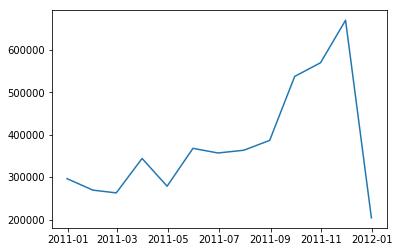

In [111]:
plt.plot(ts1_mon.index.to_pydatetime(), ts1_mon.values)

In [19]:
#Migration Analysis
#Decile analysis of shrinkage in terms of revenue and customers
import pandas as pd
df=pd.read_csv("D:\\RFMSegment.csv")
df.head()

,Unnamed: 0,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,Max_Date,R,F,M,RFMScore,monthly
0,0,12346,1/18/2011,2,1,1/18/2011,0.00,346,346,12/30/2011,1,1,1,111,1
1,1,12347,12/7/2011,7,103,12/7/2010,4310.00,23,388,12/30/2011,5,1,5,515,12
2,2,12348,9/25/2011,4,22,12/16/2010,1797.24,96,379,12/30/2011,4,1,4,414,9
3,3,12349,11/21/2011,1,73,11/21/2011,1757.55,39,39,12/30/2011,5,1,4,514,11
4,4,12350,2/2/2011,1,17,2/2/2011,334.40,331,331,12/30/2011,1,1,2,112,2


In [22]:
df['RDate'] = pd.to_datetime(df['RDate'])

In [24]:
df['Decile']=pd.qcut(df['RDate'],10)
decile_analysis=pd.DataFrame(df.groupby(['Decile'])['Monetary'].sum())
decile_analysis['Customer']=df.groupby(['Decile'])['CustomerID'].count()

In [35]:
decile_analysis

,Monetary,Customer
Decile,,
"(2010-11-30 23:59:59.999999999, 2011-03-21]",155082.250,443
"(2011-03-21, 2011-06-14]",239072.271,436
"(2011-06-14, 2011-08-23]",319793.850,437
"(2011-08-23, 2011-09-29]",442420.862,436
"(2011-09-29, 2011-10-20]",435247.190,442
"(2011-10-20, 2011-11-08]",673150.571,464
"(2011-11-08, 2011-11-18]",860665.750,442
"(2011-11-18, 2011-11-28]",807752.880,429
"(2011-11-28, 2011-12-05]",1770183.940,481


In [7]:
df['TDate'] = pd.to_datetime(df['TDate'])

In [8]:
df['Decile']=pd.qcut(df['RDate'],10)
decile_analysis=pd.DataFrame(df.groupby(['Decile'])['Monetary'].sum())
decile_analysis['Customer']=df.groupby(['Decile'])['CustomerID'].count()

In [33]:
df_decile=pd.DataFrame(decile_analysis)
df_decile

,Monetary,Customer
Decile,,
"(2010-11-30 23:59:59.999999999, 2011-03-21]",155082.250,443
"(2011-03-21, 2011-06-14]",239072.271,436
"(2011-06-14, 2011-08-23]",319793.850,437
"(2011-08-23, 2011-09-29]",442420.862,436
"(2011-09-29, 2011-10-20]",435247.190,442
"(2011-10-20, 2011-11-08]",673150.571,464
"(2011-11-08, 2011-11-18]",860665.750,442
"(2011-11-18, 2011-11-28]",807752.880,429
"(2011-11-28, 2011-12-05]",1770183.940,481


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

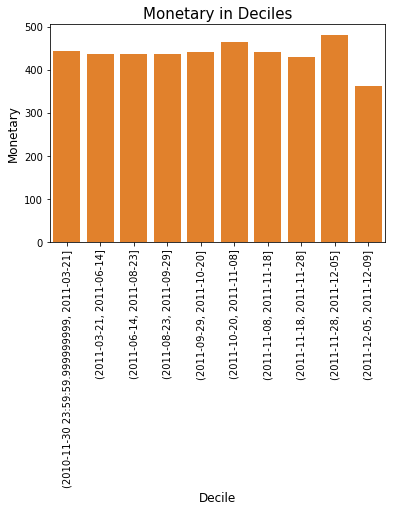

In [44]:
sns.countplot(x="Decile", data=df,color=color[1])
plt.ylabel('Monetary', fontsize=12)
plt.xlabel('Decile', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Monetary in Deciles", fontsize=15)
plt.show()


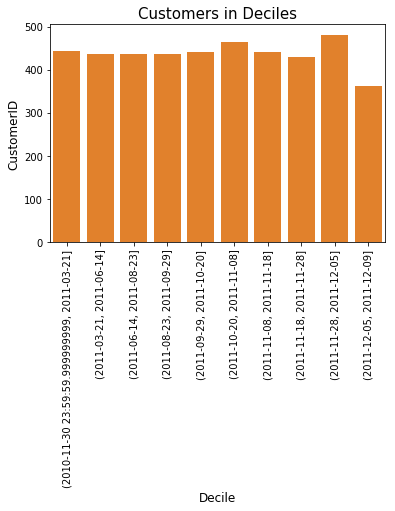

In [45]:
sns.countplot(x="Decile", data=df,color=color[1])
plt.ylabel('CustomerID', fontsize=12)
plt.xlabel('Decile', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Customers in Deciles", fontsize=15)
plt.show()

In [ ]:

#The number of customers  has a shrinkage in the year of 2011 compared to 2010
# The Monetary  also has shrinkage in the year of 2011 compared to 2010